In [28]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_classification, make_blobs
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
)
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set(style="whitegrid")

In [16]:
# Gerando o dataset sintético
np.random.seed(0)
n_samples = 300
data = {
    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,
    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,
    'categorias_produtos': np.random.randn(n_samples) * 2 + 8
}

df = pd.DataFrame(data)
df

,valor_medio_gasto,frequencia_compras,categorias_produtos
0,235.281047,8.467366,4.899141
1,208.003144,23.290653,8.834638
2,219.574760,14.409180,6.111263
3,244.817864,11.599109,8.476206
4,237.351160,18.331915,5.188074
...,...,...,...
295,222.737827,16.896178,11.995912
296,201.954499,12.649836,6.286901
297,211.659074,13.916343,4.916825
298,192.011019,10.349217,13.188849


#Para decidir entre K-means e DBScan irei plotar um boxplot para ver se tem muitos outliers caso tenha usarei DBScan pois ele identifica os outliers


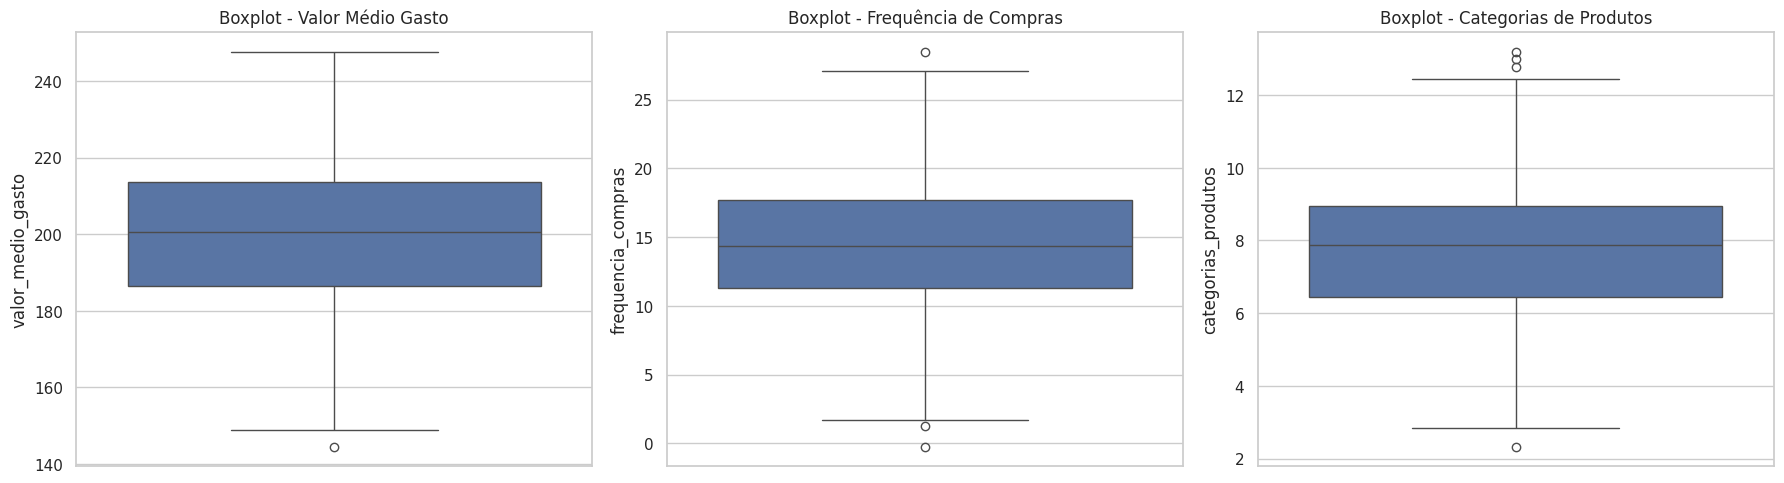

                 Variável  Número de Outliers  Percentual de Outliers (%)
0       Valor Médio Gasto                   1                    0.333333
1   Frequência de Compras                   3                    1.000000
2  Categorias de Produtos                   4                    1.333333


In [20]:
# Criando boxplots para identificar outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot para Valor Médio Gasto
sns.boxplot(y=df["valor_medio_gasto"], ax=axes[0])
axes[0].set_title("Boxplot - Valor Médio Gasto")

# Boxplot para Frequência de Compras
sns.boxplot(y=df["frequencia_compras"], ax=axes[1])
axes[1].set_title("Boxplot - Frequência de Compras")

# Boxplot para Categorias de Produtos
sns.boxplot(y=df["categorias_produtos"], ax=axes[2])
axes[2].set_title("Boxplot - Categorias de Produtos")

plt.tight_layout()
plt.show()
# Função para calcular o número de outliers com base no IQR
def detectar_outliers(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return len(outliers), (len(outliers) / len(df)) * 100

# Contagem de outliers para cada variável
outliers_valor_medio, pct_valor_medio = detectar_outliers("valor_medio_gasto")
outliers_frequencia, pct_frequencia = detectar_outliers("frequencia_compras")
outliers_categorias, pct_categorias = detectar_outliers("categorias_produtos")

# Criando DataFrame com os resultados
outliers_df = pd.DataFrame({
    "Variável": ["Valor Médio Gasto", "Frequência de Compras", "Categorias de Produtos"],
    "Número de Outliers": [outliers_valor_medio, outliers_frequencia, outliers_categorias],
    "Percentual de Outliers (%)": [pct_valor_medio, pct_frequencia, pct_categorias]
})

# Exibindo os resultados
print(outliers_df)


##como podemos ver tem uma porcentagem muito baixa de outliers por isso optarei pelo K-means

In [31]:
X = df[['categorias_produtos', 'valor_medio_gasto', 'frequencia_compras']].values
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [37]:
df['clusters'] = k_means.predict(X)

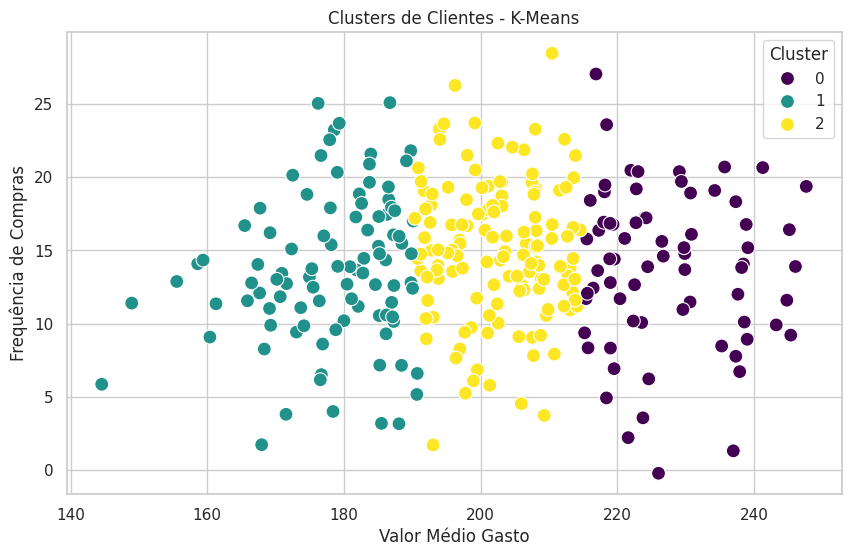

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["valor_medio_gasto"], y=df["frequencia_compras"], hue=df["clusters"], palette="viridis", s=100)
plt.title("Clusters de Clientes - K-Means")
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.legend(title="Cluster")
plt.show()

#Vantagens :
- Os grupos resultantes podem ser facilmente analisados para entender perfis de clientes.
- Funciona bem mesmo para grandes volumes de dados
#Desvantagens:
- Sensível a outliers
- Se os grupos tiverem formas não esféricas ou diferentes densidades, outros algoritmos (como DBSCAN) poderiam ser mais apropriados

#Como os clusters formados podem ser interpretados para gerar insights para a loja on-line?

### com a formação dos clusters podemos definir o tipo de cliente se ele é um cliente que gasta muito e compra muito ou compra pouco, cliente que gasta nem muito nem pouco e compra pouco ou muito e cliente que compra produtos baratos e de vez em quando com isso poderia ser feito programas de fidelidade para os clientes vips ou promoções para os outros 2 clusters de produtos baratos